In [84]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

In [73]:
data <- data.table::fread(file = "tidy_data_wide.csv")
sheets <- c("20min STM", "1hr STM", "3hr STM")
experiments <- c("20min STM", "1hr STM", "3hr STM")
genotypes <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
data<-data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=c("20min STM",  "1hr STM", "2hr STM", "3hr STM"))
wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")



In [74]:
# panel2_data <- data[experiment != "20min STM" | User == "CH",]
panel2_data <- data

In [75]:
panel2_data_long <- melt(panel2_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [82]:
A <- panel2_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel2_data[experiment=="1hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
C <- panel2_data[experiment=="3hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]

In [85]:
data.table::fwrite(x = A, file="prism/Fig2/Figure2_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig2/Figure2_1hr STM.csv", quote=TRUE)
data.table::fwrite(x = C, file="prism/Fig2/Figure2_3hr STM.csv", quote=TRUE)
data.table::fwrite(x = Cbind(Ad, Bd, Cd), file="prism/Fig2/Figure_2_boxplot.csv")

In [79]:
panel2_data[, .N, by=experiment]

experiment,N
<fct>,<int>
20min STM,142
3hr STM,39
1hr STM,26


[1] -1.02  0.70


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3

$direction
[1] "horizontal"


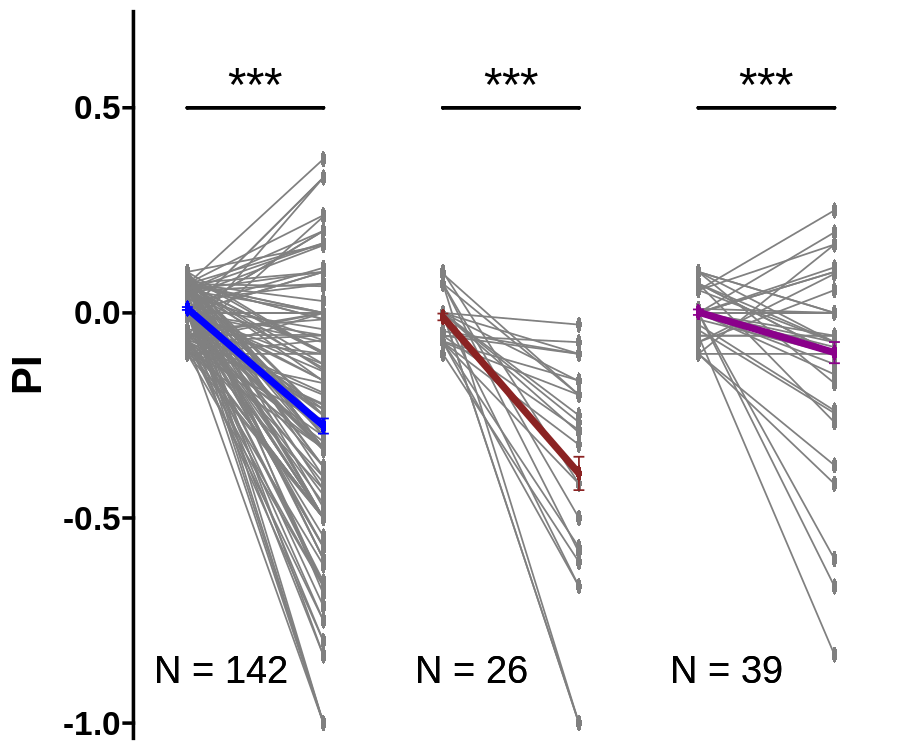

In [78]:
ratio=2.5
size_unit=2.5
panel2A <- learning_plot(
    panel2_data_long, "experiment", "horizontal", y_limits=y_limits_panel2,
    colors=colors_panel2[1:length(experiments)], test=paired_t_test,
    map_signif_level=TRUE,
    starsize=10, textsize=8,
    hjust_text=0.25,
    y_annotation=0.5
)
save_learning_plot(plot = panel2A, filename = "figures/panel2A.svg", ratio=ratio, size_unit=size_unit)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel2A$n_facets)
panel2A

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

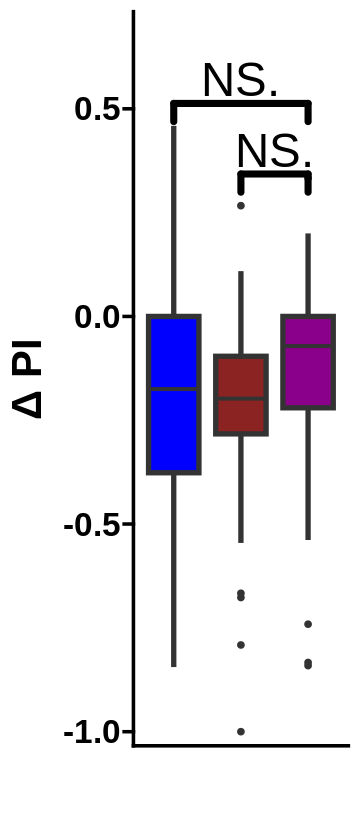

In [53]:
ratio=7
size_unit=1
panel2B <- summary_plot(
    data=panel2_data_long,
    group = "experiment", 
    comparisons = list(
        c("20min STM", "3hr STM"),
        c("1hr STM", "3hr STM")
    ),
    map_signif_level=T,
    annotation_y=c(0.44, .27),
    test=unpaired_t_test,
    colors=colors_panel2[1:length(experiments)],
    x_labels_angle=45,
    y_limits=y_limits_panel2,
    starsize=10,
    text_y_size=20,
    title_y_size=25
)
panel2B$gg <- panel2B$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel2B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel2B
save_summ_plot(plot=panel2B, filename = "figures/panel2B.svg", size_unit=size_unit, ratio=ratio)